

---


# **Retail Sales Analysis and Insights project**


---


### Name :muhammed fidil

### Organization : Entri Elevate

### Date : [Evaluation Date]


---




---




# **1. Overview of Problem Statement:**
### analyze a retail dataset to predict customer ratings by following a structured approach outlined in the provided file. It begins with data preparation, including cleaning and handling missing values, followed by exploratory data analysis (EDA) to visualize trends, such as spending patterns across product categories and the relationship between age and spending. Relevant features are selected and transformed for modeling, where logistic regression is applied to predict ratings based on factors like total spending and product categories. This comprehensive analysis aims to uncover insights into customer behavior and improve the accuracy of rating predictions in the retail sector.   


---



---
#**1.Objective of the Project: Retail Sales Analysis and Insights**
The objective of this project is to analyze a retail dataset to predict customer ratings based on various factors such as total spending, product categories, and customer demographics. This analysis follows a structured approach that includes:

##**2.Data Collection & Preparation**

.Load and clean the dataset.

.Handle missing values appropriately.

.Remove redundant or personally identifiable information (PII).

##**3.Exploratory Data Analysis (EDA)**

.Visualize trends such as spending behavior across product categories.

.Analyze the relationship between customer demographics (e.g., age) and spending.

.Identify potential outliers and data distributions.

##**4.Feature Engineering & Selection**

.Encode categorical variables using label encoding or one-hot encoding.

.Select the most relevant features using techniques like Random Forest and SelectKBest.

.Handle imbalanced data using SMOTE (Synthetic Minority Over-sampling Technique).

.Scale numerical features using MinMax Scaling or Standardization.
Splitting Data into Training & Testing Sets

.Ensure an appropriate ratio (e.g., 80% training, 20% testing) for model evaluation.

##**5.Model Development & Training**

.Train at least 5 different machine learning models for prediction.

    .Classification models: Logistic Regression, SVM, Decision Tree, MLP Classifier, Naïve Bayes, Random Forest, KNN, Gradient Boost, AdaBoost.

    .Regression models (if applicable): Linear Regression, SVR, MLP Regressor, Random Forest Regressor, Gradient Boost, AdaBoost.

##**6.Model Evaluation**


.Use performance metrics to assess model accuracy and reliability:

    .Classification: Accuracy, Precision, Recall, F1-score, ROC Curve.

    .Regression: MAE, MSE, RMSE, R² Score.
.Compare model performance and select the best-performing approach.

##**7.Hyperparameter Tuning & Pipeline Optimization**

.Apply RandomizedSearchCV or GridSearchCV to optimize model parameters.

.Implement a pipeline for automated processing.

##**8.Model Deployment & Storage**

.Save the best-performing model using Joblib for future use.

##**9.Testing with Unseen Data**

.Evaluate model performance on new/unseen data to ensure generalization.

##**10.Insights & Business Impact**

.rovide key insights on customer buying behavior and rating trends.

.Offer actionable recommendations for marketing, inventory management, and customer engagement strategies.

##**11.Future Work**
.Explore deep learning approaches for improved predictions.
Continuously update the model with new data.

.Expand feature engineering to incorporate more variables for better accuracy.

###**The ultimate goal is to provide data-driven recommendations for better decision-making in the retail sector.**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import LabelEncoder

In [3]:
file_path = "/content/drive/My Drive/new_retail_data.csv"

df = pd.read_csv(file_path)

df = df.sample(frac=0.3, random_state=42)


In [4]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

df.head()

Dataset contains 90603 rows and 30 columns.


,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
16143,8973042.0,20082.0,Ronald Williamson,David75@gmail.com,3.740098e+09,4618 Pamela Wells Suite 878,Portsmouth,England,8805.0,UK,...,1003.833112,Clothing,Zara,Dress,Good,Express,Debit Card,Delivered,4.0,Shift dress
168936,6700726.0,59044.0,Julie Yoder,Adrian66@gmail.com,4.959731e+09,5158 Russell Creek Apt. 082,Darwin,New South Wales,71099.0,Australia,...,103.655237,Electronics,Apple,Smartphone,Excellent,Standard,Cash,Delivered,5.0,Huawei P
28403,9007686.0,32393.0,Isaac Livingston,Robyn24@gmail.com,6.717169e+09,06198 Stephen Row,Frankfurt,Berlin,83860.0,Germany,...,429.278597,Electronics,Samsung,Smartphone,Average,Same-Day,Cash,Delivered,2.0,Nokia
5979,4660855.0,83623.0,Jacob Gonzalez,Joshua53@gmail.com,6.929993e+09,491 Dennis Bridge Suite 461,Portsmouth,England,97824.0,UK,...,591.601993,Home Decor,IKEA,Lighting,Excellent,Same-Day,Cash,Processing,4.0,Track lighting
28921,5634416.0,39543.0,Denise Gonzales,Paul89@gmail.com,2.665313e+09,61842 Anna Lodge Suite 608,Frankfurt,Berlin,16741.0,Germany,...,456.188370,Home Decor,Home Depot,Decorations,Bad,Standard,Debit Card,Delivered,1.0,Decorative pillows


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 90603 entries, 16143 to 62456
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    90503 non-null  float64
 1   Customer_ID       90505 non-null  float64
 2   Name              90488 non-null  object 
 3   Email             90500 non-null  object 
 4   Phone             90488 non-null  float64
 5   Address           90508 non-null  object 
 6   City              90535 non-null  object 
 7   State             90517 non-null  object 
 8   Zipcode           90508 non-null  float64
 9   Country           90517 non-null  object 
 10  Age               90558 non-null  float64
 11  Gender            90506 non-null  object 
 12  Income            90523 non-null  object 
 13  Customer_Segment  90536 non-null  object 
 14  Date              90495 non-null  object 
 15  Year              90491 non-null  float64
 16  Month             90510 non-null  object 

In [6]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       Transaction_ID   Customer_ID         Phone      Zipcode           Age  \
count    9.050300e+04  90505.000000  9.048800e+04  90508.00000  90558.000000   
mean     5.496032e+06  55031.645335  5.493589e+09  50352.99926     35.488361   
std      2.594873e+06  25924.223646  2.597124e+09  28950.65628     15.004715   
min      1.000007e+06  10001.000000  1.000049e+09    501.00000     18.000000   
25%      3.242276e+06  32670.000000  3.245504e+09  25528.75000     22.000000   
50%      5.507551e+06  54967.000000  5.487490e+09  50578.00000     32.000000   
75%      7.731238e+06  77434.000000  7.744629e+09  75253.25000     46.000000   
max      9.999995e+06  99998.000000  9.999835e+09  99949.00000     70.000000   

               Year  Total_Purchases        Amount  Total_Amount       Ratings  
count  90491.000000     90495.000000  90516.000000  90504.000000  90545.000000  
mean    2023.166105         5.348329    255.070373   1364.683418      3.161975  
std        0.372

In [7]:
print("Column Names:")
print(df.columns)

Column Names:
Index(['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address',
       'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income',
       'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases',
       'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand',
       'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method',
       'Order_Status', 'Ratings', 'products'],
      dtype='object')


In [8]:
print("Missing Values in Dataset:\n", df.isnull().sum())

Missing Values in Dataset:
 Transaction_ID      100
Customer_ID          98
Name                115
Email               103
Phone               115
Address              95
City                 68
State                86
Zipcode              95
Country              86
Age                  45
Gender               97
Income               80
Customer_Segment     67
Date                108
Year                112
Month                93
Time                108
Total_Purchases     108
Amount               87
Total_Amount         99
Product_Category     84
Product_Brand        92
Product_Type          0
Feedback             58
Shipping_Method     106
Payment_Method       83
Order_Status         73
Ratings              58
products              0
dtype: int64


In [9]:
df.isnull().sum()

,0
Transaction_ID,100
Customer_ID,98
Name,115
Email,103
Phone,115
Address,95
City,68
State,86
Zipcode,95
Country,86


In [10]:
# Define Features (X) and Target (y)
X = df.drop(columns=['Ratings'])  # Replace 'Ratings' with actual target column
y = df['Ratings']

# Drop NaN values from X and keep y aligned
X = X.dropna()
y = y.loc[X.index]

print("Missing values dropped successfully!")

Missing values dropped successfully!


In [11]:
# Drop datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns
df = df.drop(columns=datetime_cols)

# Handle missing values for numeric columns
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).apply(lambda col: col.fillna(col.median()))

# Drop rows where critical non-numeric columns contain NaN (optional)
df = df.dropna(subset=['Transaction_ID', 'Customer_ID', 'Ratings'])  # Modify as needed

# Display missing values after handling
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 Transaction_ID        0
Customer_ID           0
Name                115
Email               103
Phone                 0
Address              95
City                 68
State                86
Zipcode               0
Country              86
Age                   0
Gender               97
Income               80
Customer_Segment     67
Date                108
Year                  0
Month                93
Time                108
Total_Purchases       0
Amount                0
Total_Amount          0
Product_Category     84
Product_Brand        92
Product_Type          0
Feedback             58
Shipping_Method     106
Payment_Method       83
Order_Status         73
Ratings               0
products              0
dtype: int64


In [12]:
df = df.drop(columns=['Name', 'Email', 'Address', 'Phone', 'Zipcode', 'Date', 'Time'])
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda col: col.fillna(col.mode()[0]))

In [13]:
print("Remaining Missing Values:\n", df.isnull().sum())

Remaining Missing Values:
 Transaction_ID      0
Customer_ID         0
City                0
State               0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Year                0
Month               0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64


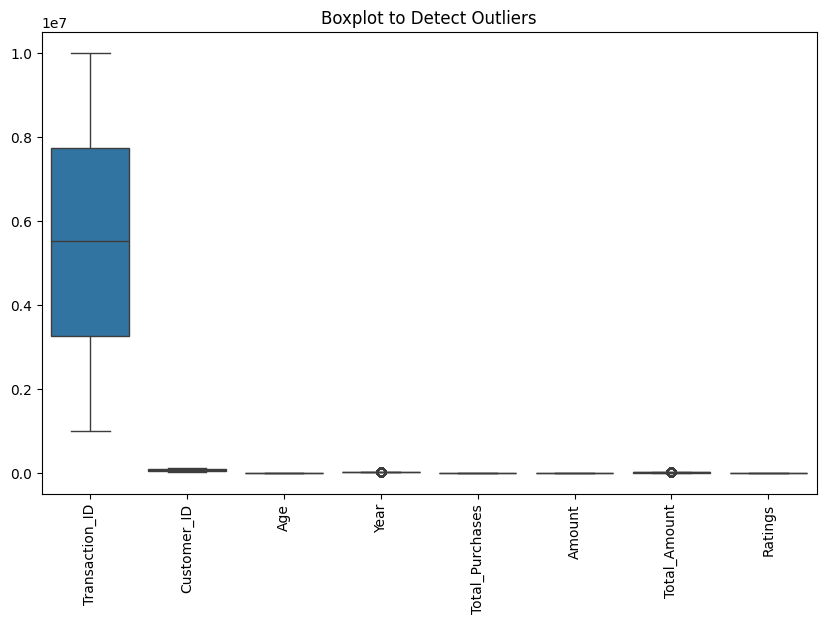

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=90)
plt.show()

def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

for col in df.select_dtypes(include=['number']).columns:
    cap_outliers(col)

Skewness of numerical columns:
 Transaction_ID     0.000910
Customer_ID        0.001978
Age                0.651345
Year               0.000000
Total_Purchases    0.074531
Amount            -0.006456
Total_Amount       0.930912
Ratings           -0.236153
dtype: float64


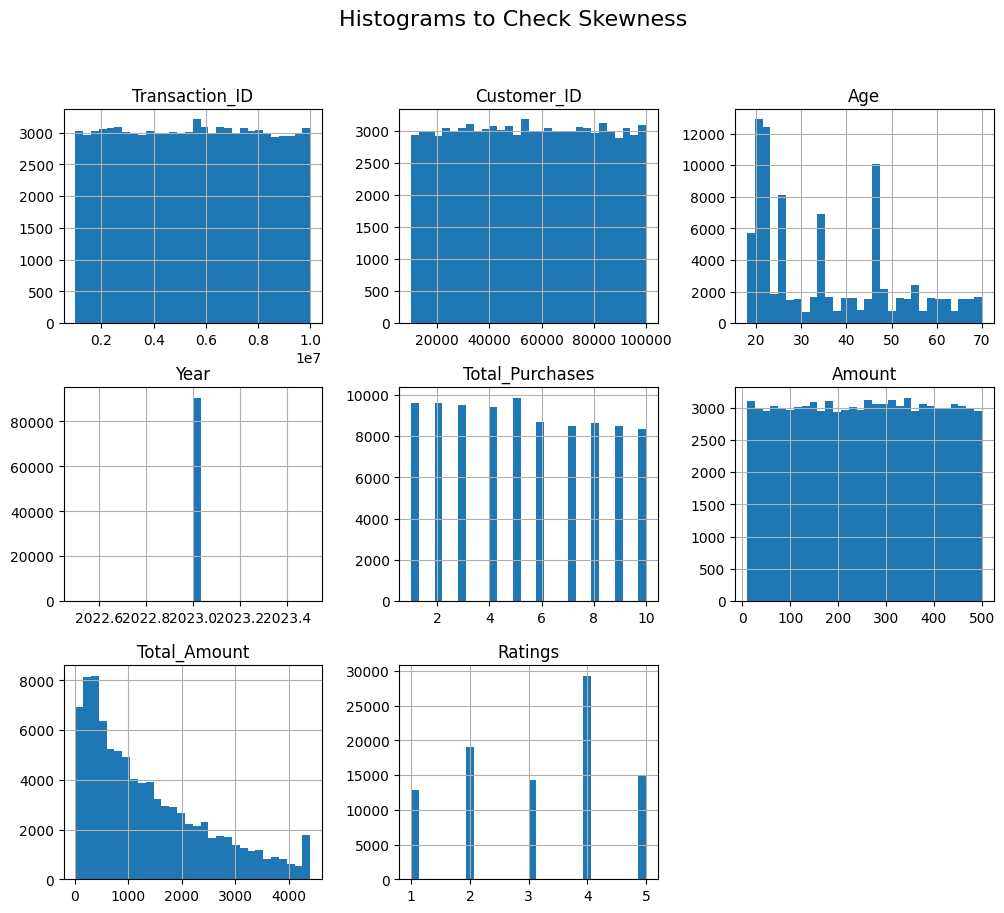

✅ Skewness handled successfully!


In [15]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Skewness of numerical columns:\n", df[num_cols].skew())


df[num_cols].hist(figsize=(12,10), bins=30)
plt.suptitle("Histograms to Check Skewness", fontsize=16)
plt.show()


for col in num_cols:
    if abs(df[col].skew()) > 1:
        df[col] = np.log1p(df[col])

print("✅ Skewness handled successfully!")

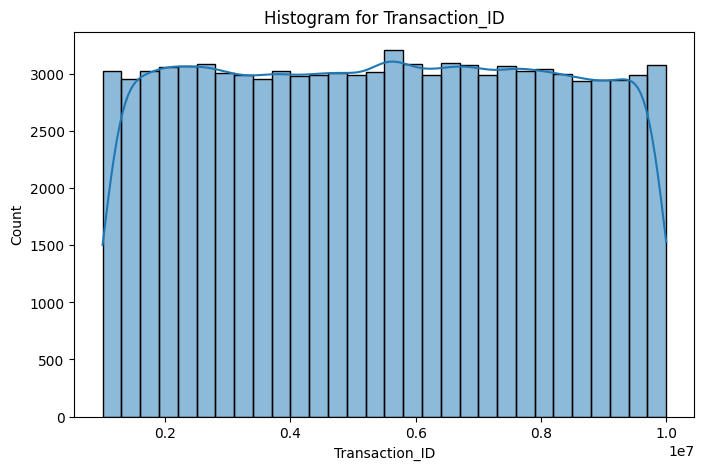

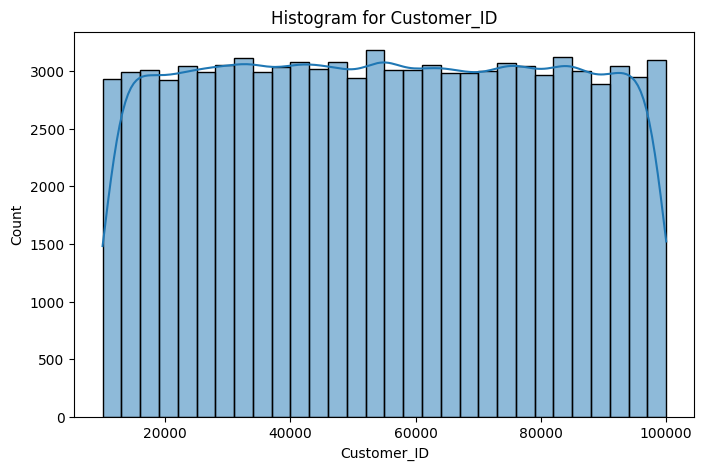

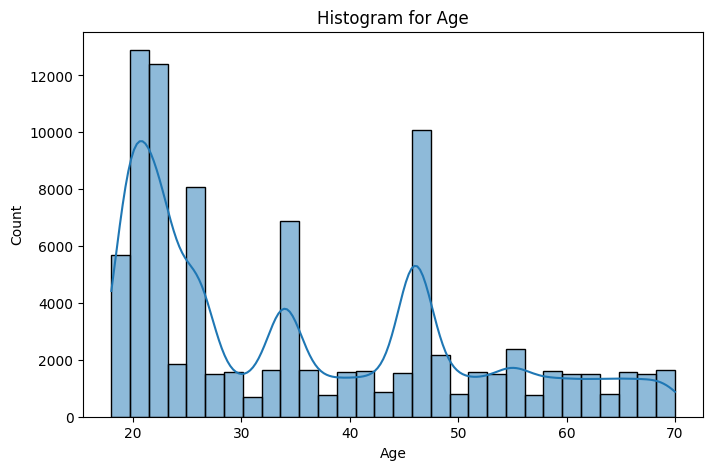

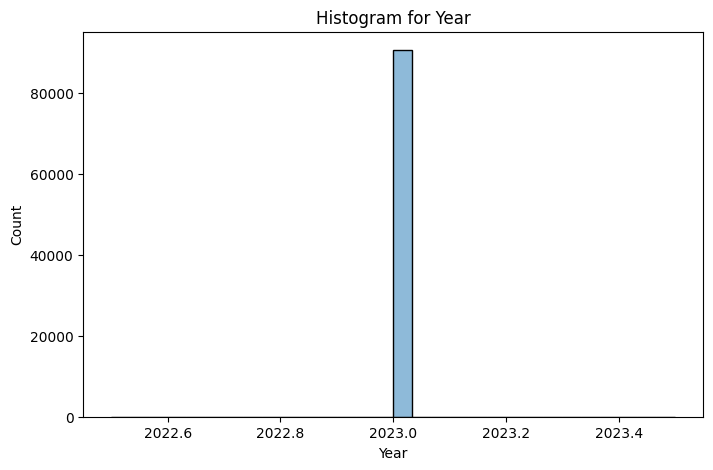

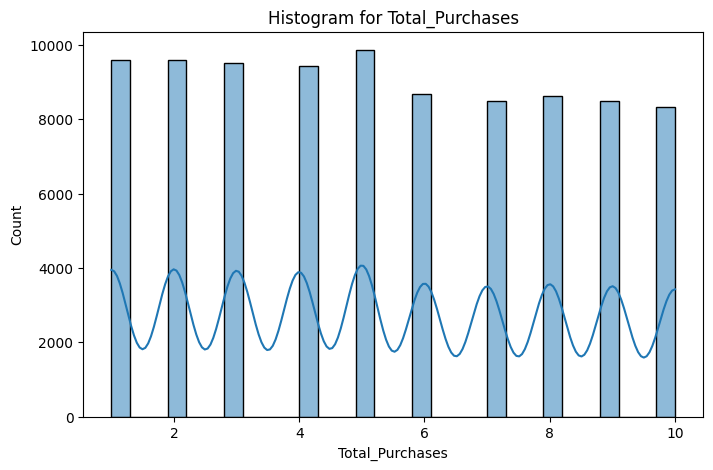

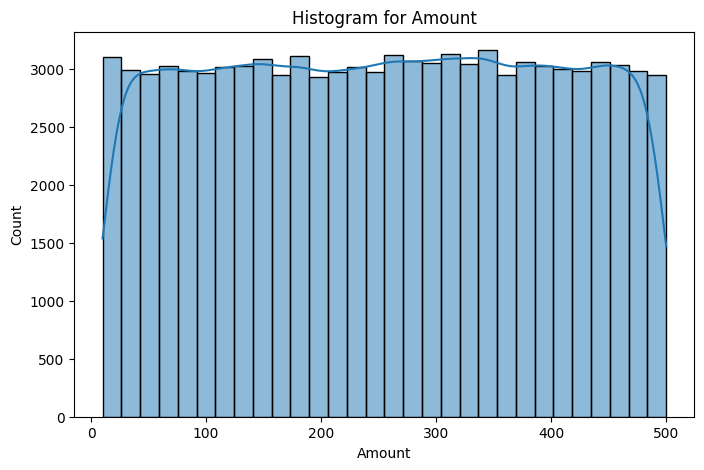

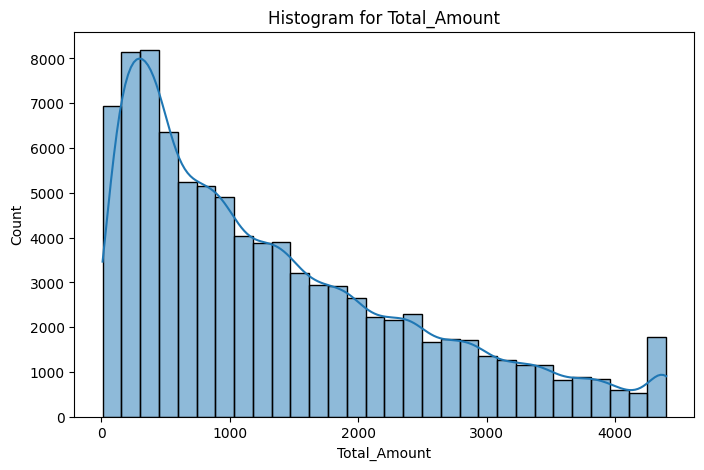

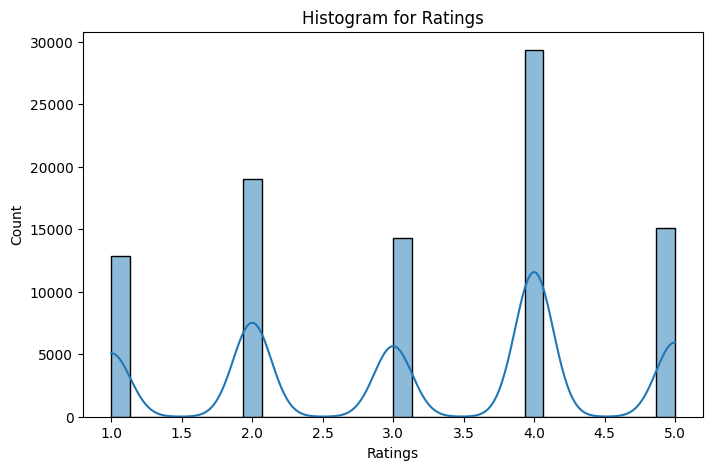

In [16]:
for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

Categorical Columns Selected for Countplot: ['Country', 'Gender', 'Income', 'Customer_Segment', 'Month', 'Product_Category']


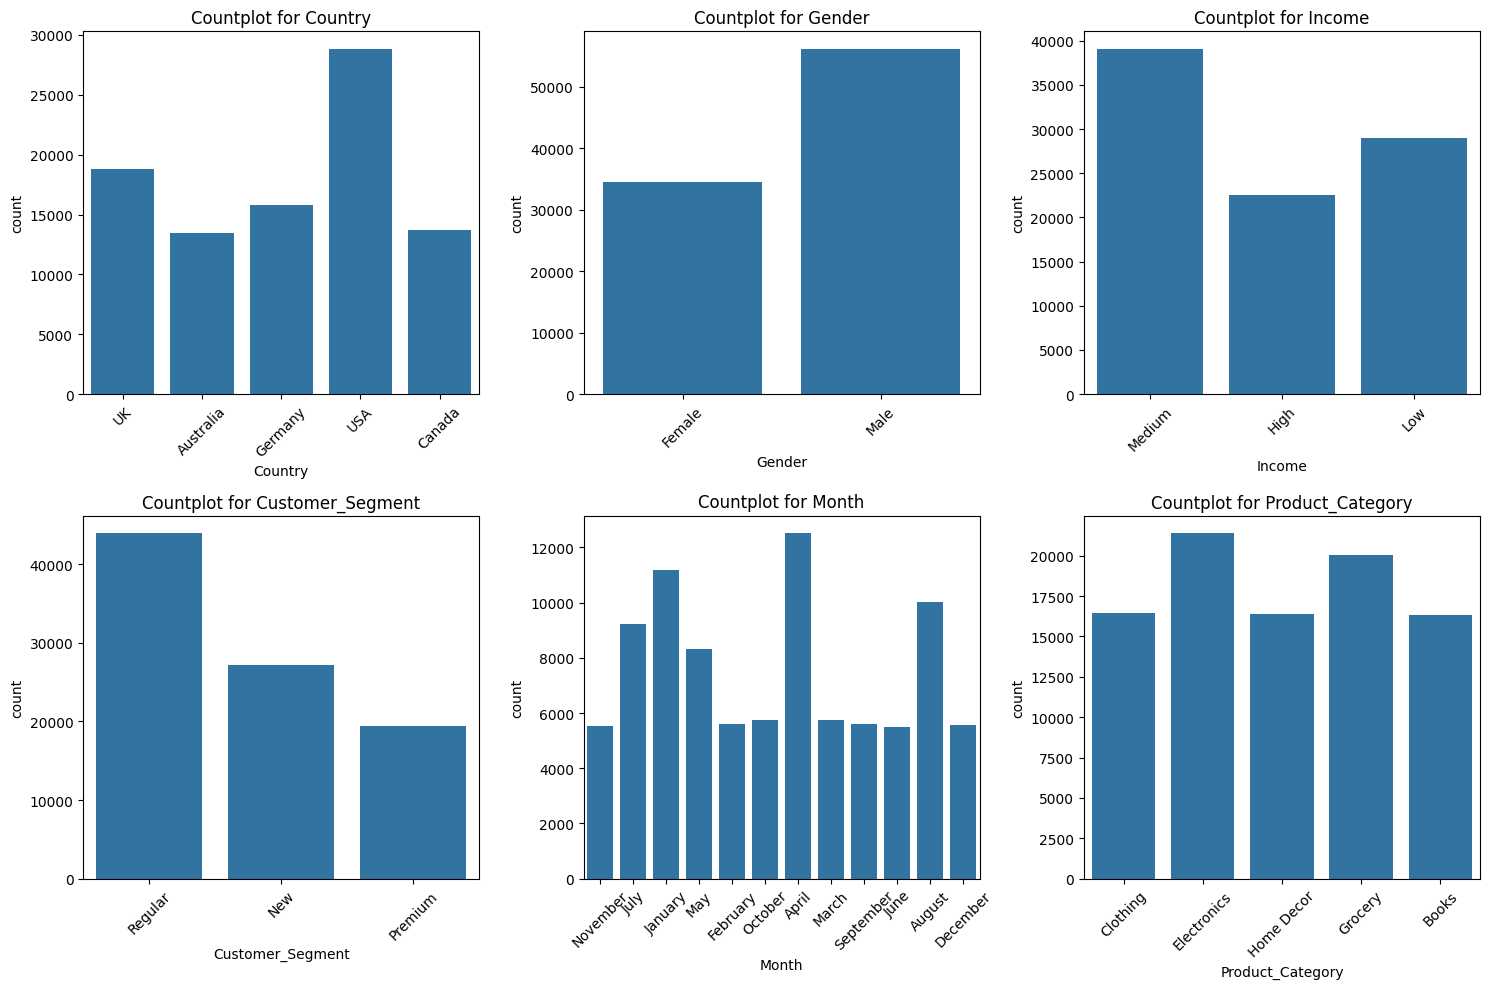

In [17]:
cat_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() < 15]

cat_cols = cat_cols[:6]
print(f"Categorical Columns Selected for Countplot: {cat_cols}")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for ax, col in zip(axes.flatten(), cat_cols):
    sns.countplot(x=df[col], ax=ax)
    ax.set_title(f"Countplot for {col}")

    ax.set_xticks(range(len(df[col].unique())))
    ax.set_xticklabels(df[col].unique(), rotation=45)

plt.tight_layout()
plt.show()

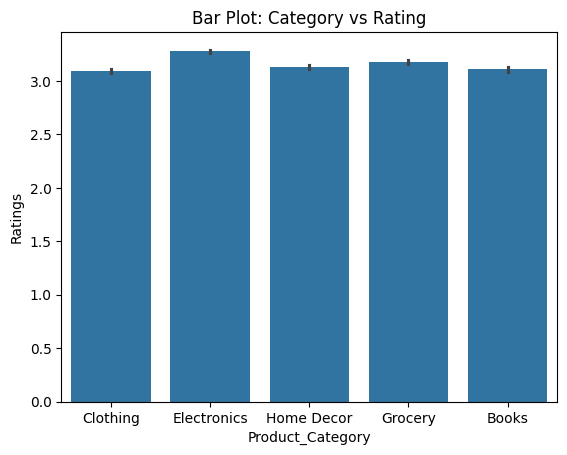

In [18]:
sns.barplot(x=df['Product_Category'], y=df['Ratings'])
plt.title("Bar Plot: Category vs Rating")
plt.show()

**1. Bar plot**: The bar plot indicates which product categories generate the highest total sales. This visualization helps identify the most profitable categories, allowing retailers to focus their marketing and inventory strategies on these high-performing segments.

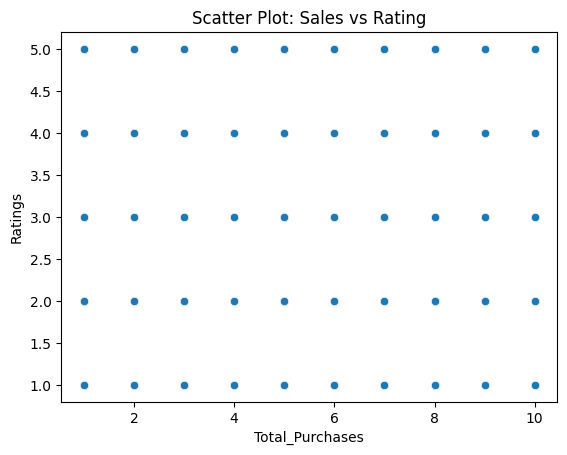

In [19]:
sns.scatterplot(x=df['Total_Purchases'], y=df['Ratings'])
plt.title("Scatter Plot: Sales vs Rating")
plt.show()

**2.Scatter plot:** The scatter plot reveals how spending varies with age. It may show trends such as whether younger or older customers tend to spend more, which can inform targeted marketing strategies and product offerings based on age demographics

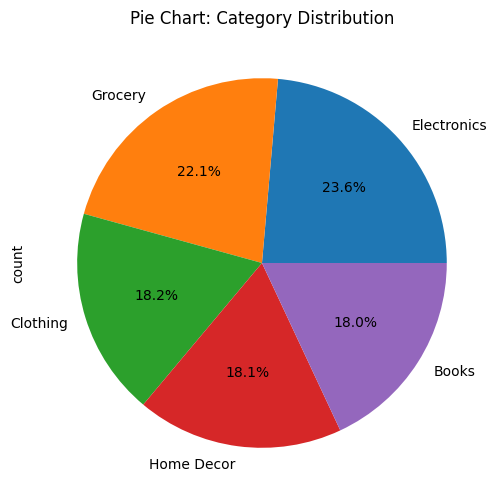

In [20]:
df['Product_Category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Pie Chart: Category Distribution")
plt.show()

 **3.Pie chart:** The pie chart illustrates the proportions of different payment methods, highlighting customer preferences. Understanding which payment methods are most popular can help retailers optimize their payment processing systems and enhance customer satisfaction.

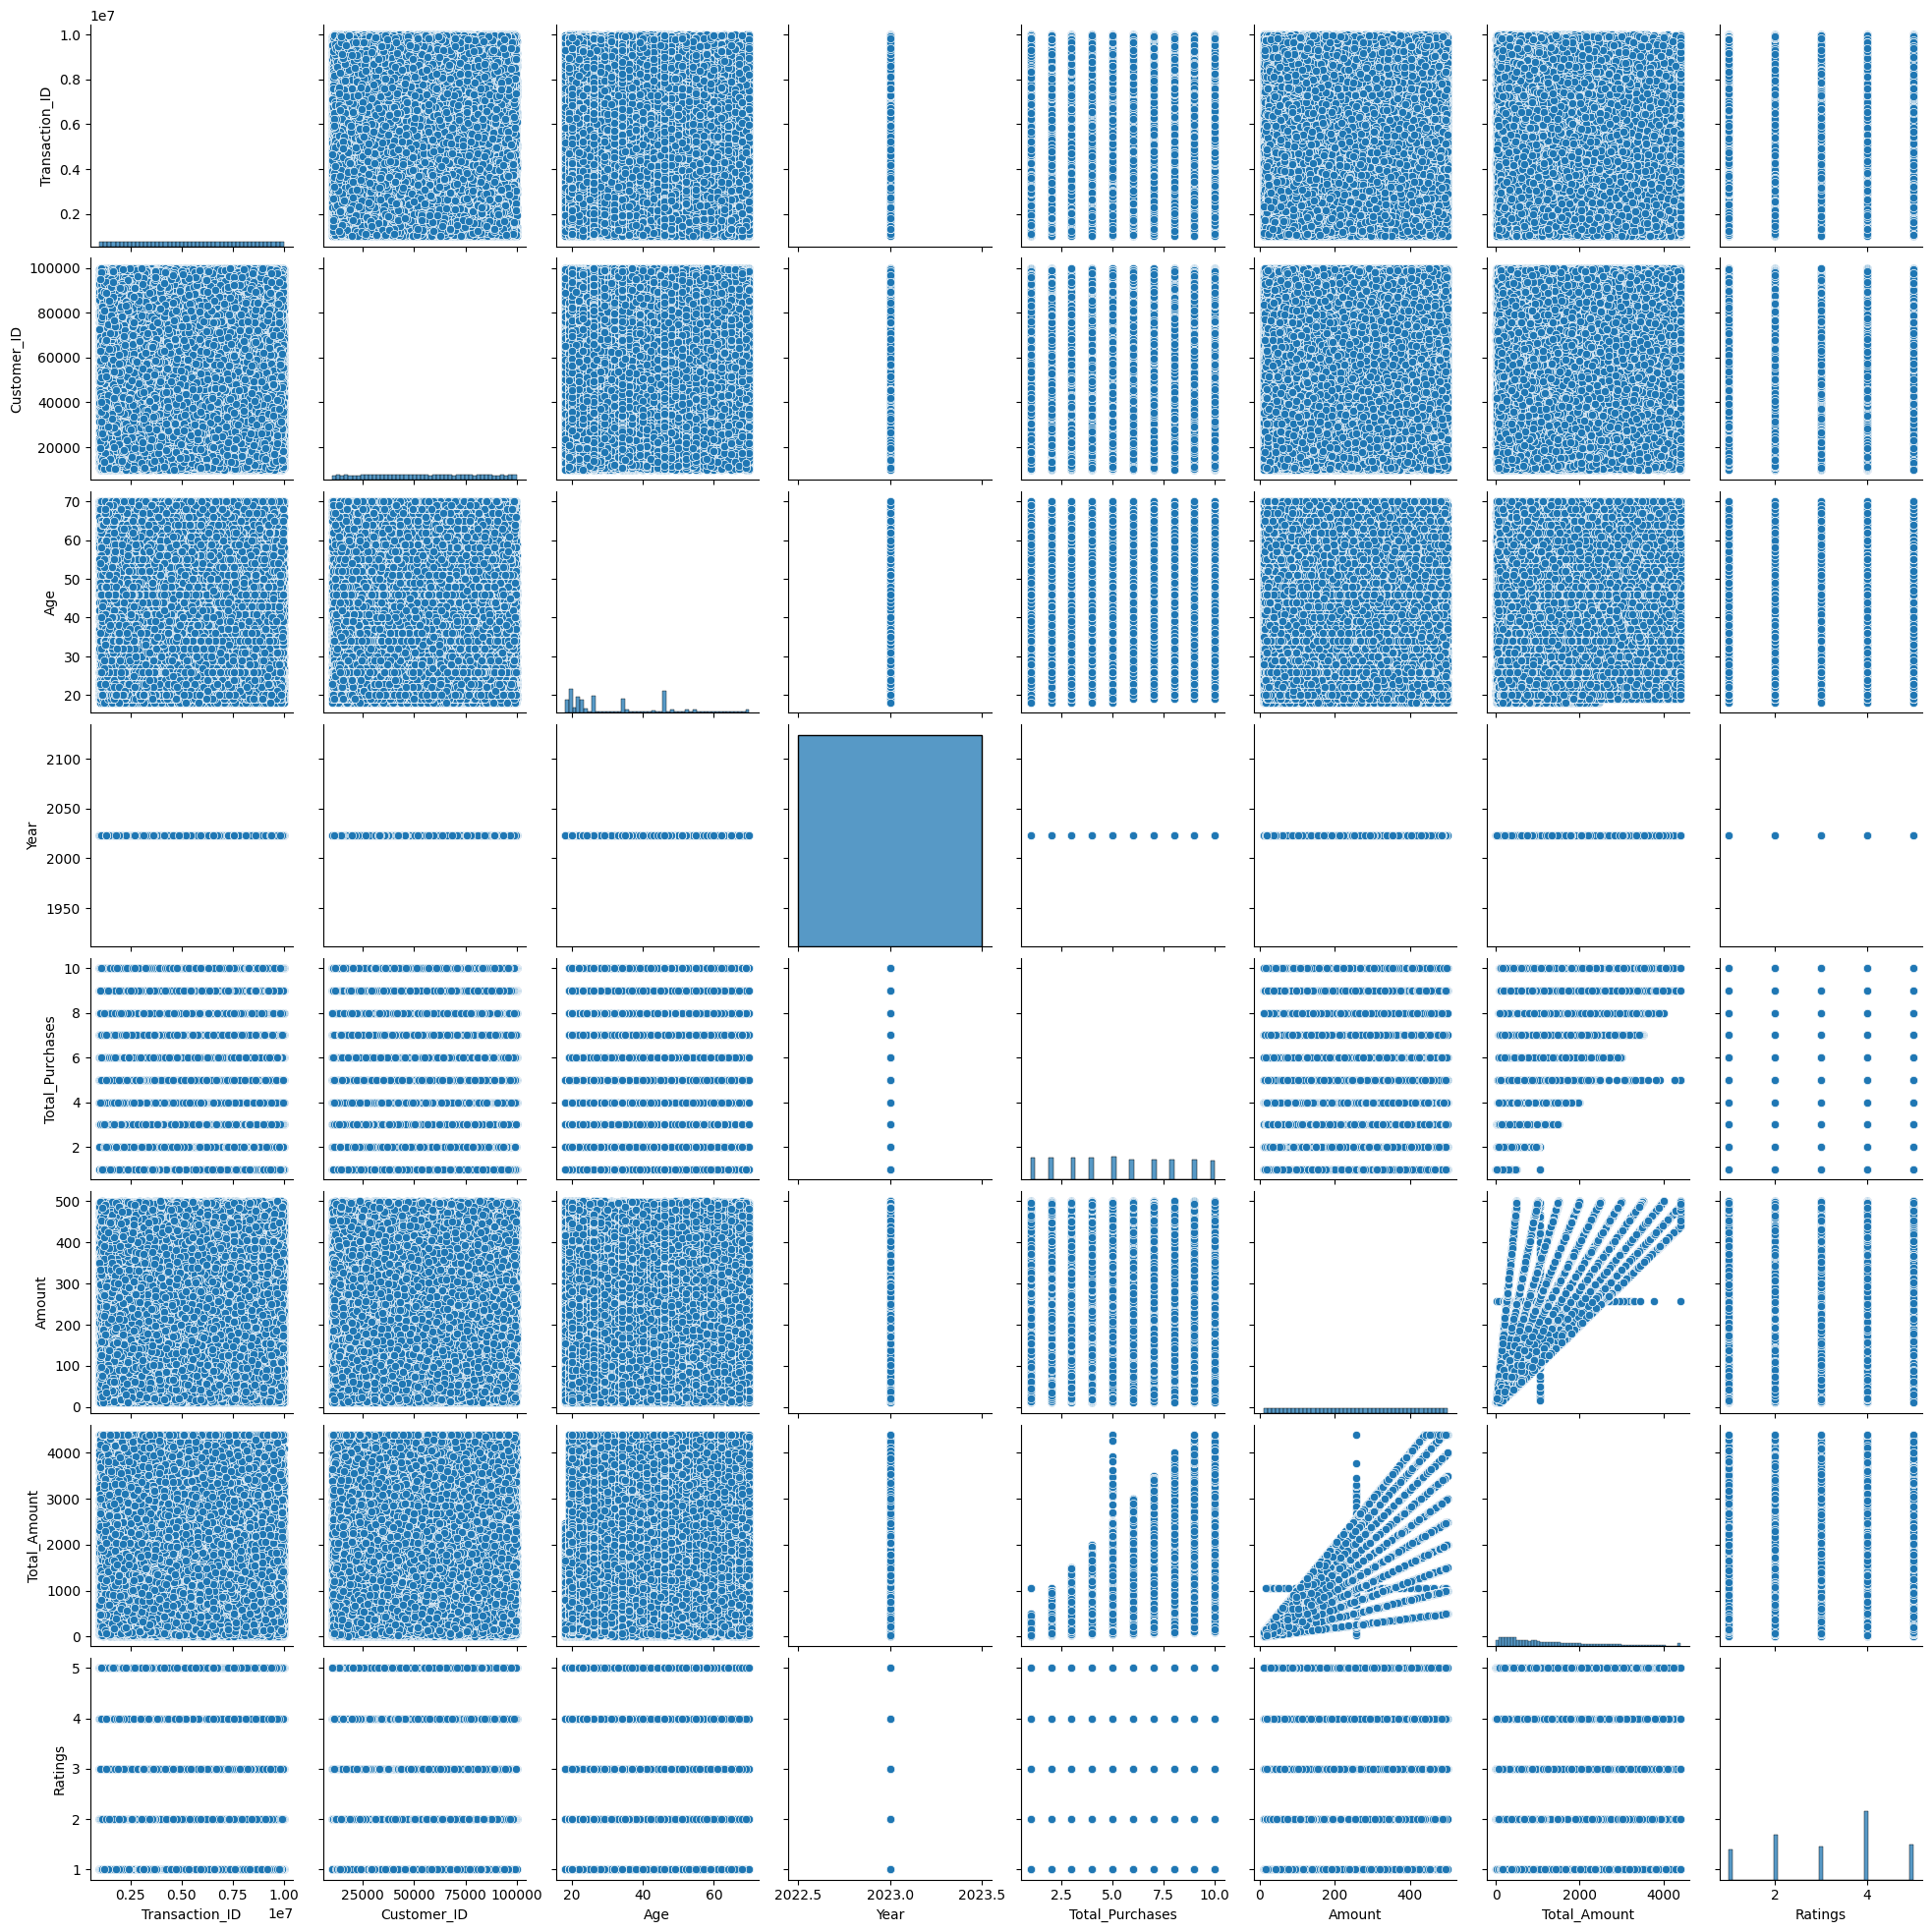

In [21]:
sns.pairplot(df)
plt.show()

**4.Pairplot**:The pairplot provides a comprehensive view of how these numerical variables interact with each other. It can reveal correlations, trends, and potential outliers, which are crucial for understanding customer behavior and improving sales strategies.

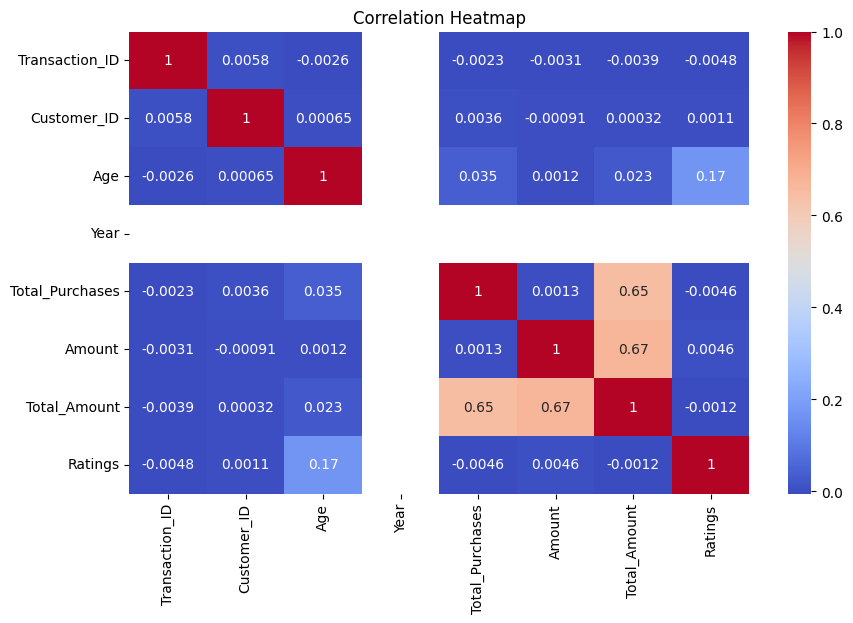

In [22]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**5.Heatmap:** The heatmap highlights the strength and direction of relationships between numerical variables. For instance, a strong positive correlation between total purchases and total amount spent suggests that as customers buy more, they tend to spend more, which can guide promotional strategies.

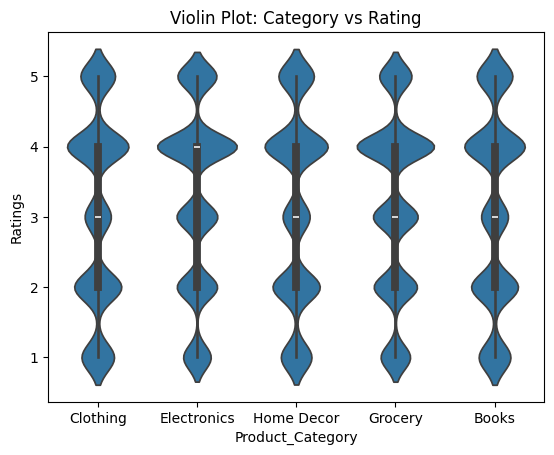

In [23]:
sns.violinplot(x=df['Product_Category'], y=df['Ratings'])
plt.title("Violin Plot: Category vs Rating")
plt.show()

**6.Violinplot:** The violin plot provides insights into how spending varies among different customer segments. It can reveal which segments are more profitable and help tailor marketing efforts to maximize revenue from specific groups.

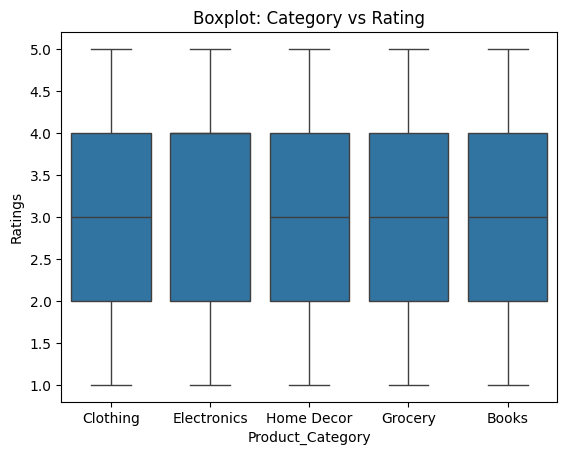

In [24]:
sns.boxplot(x=df['Product_Category'], y=df['Ratings'])
plt.title("Boxplot: Category vs Rating")
plt.show()

**6.Violinplot:** The violin plot provides insights into how spending varies among different customer segments. It can reveal which segments are more profitable and help tailor marketing efforts to maximize revenue from specific groups.

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Drop datetime columns
datetime_cols = df.select_dtypes(include=['datetime64']).columns
df = df.drop(columns=datetime_cols, errors='ignore')

# Handle Missing Values
for col in df.select_dtypes(include=['number']).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Separate Features and Target Variable
X = df.drop(columns=['Ratings'])  # Features
y = df['Ratings']  # Target

# Encode Categorical Variables
label_encoders = {}
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Store encoders for future use

# Feature Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Handle Class Imbalance Using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Final Feature-Engineered Dataset
print("Feature Engineering Completed. Data is ready for model training.")

Feature Engineering Completed. Data is ready for model training.


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Select numerical columns for scaling
numeric_cols = X.select_dtypes(include=['number']).columns

# Standardization (Z-score Scaling)
standard_scaler = StandardScaler()
X_standardized = standard_scaler.fit_transform(X[numeric_cols])
X_standardized_df = pd.DataFrame(X_standardized, columns=[col + "_std" for col in numeric_cols], index=X.index)

# Normalization (Min-Max Scaling)
minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X[numeric_cols])
X_normalized_df = pd.DataFrame(X_normalized, columns=[col + "_norm" for col in numeric_cols], index=X.index)

# Add scaled values to the dataset (keeping original features)
X_scaled = pd.concat([X, X_standardized_df, X_normalized_df], axis=1)

print("Feature Scaling Completed using Both Standardization and Normalization!")

Feature Scaling Completed using Both Standardization and Normalization!


In [27]:
from sklearn.model_selection import train_test_split

# Define features and target
X = X_scaled  # Using the scaled dataset
y = df['Ratings']  # Target variable

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")
print("Data Splitting Completed!")

Training Set: (72482, 66), Testing Set: (18121, 66)
Data Splitting Completed!


In [28]:
import time

start_time = time.time()

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Choose models based on the task (classification or regression)
if y_train.nunique() > 10:  # More than 10 unique values → Regression
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest Regressor": RandomForestRegressor(n_estimators=50, random_state=42),
        "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=50, random_state=42),
        "Support Vector Regressor (SVR)": SVR(),
        "K-Nearest Neighbors Regressor": KNeighborsRegressor()
    }
else:  # Classification
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest Classifier": RandomForestClassifier(n_estimators=50, random_state=42),
        "Gradient Boosting Classifier": GradientBoostingClassifier(n_estimators=50, random_state=42),
        "Support Vector Classifier (SVC)": SVC(),
        "K-Nearest Neighbors Classifier": KNeighborsClassifier()
    }

# Train models
trained_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

print("✅ Training Completed for 5 Models!")


end_time = time.time()
print(f"Training Time: {end_time - start_time:.2f} seconds")


✅ Training Completed for 5 Models!
Training Time: 596.52 seconds


Model: Logistic Regression
Accuracy: 0.674797196622703
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2441
         2.0       1.00      1.00      1.00      3820
         3.0       0.52      0.49      0.50      2913
         4.0       0.49      0.57      0.53      5812
         5.0       0.51      0.38      0.44      3135

    accuracy                           0.67     18121
   macro avg       0.70      0.69      0.69     18121
weighted avg       0.68      0.67      0.67     18121



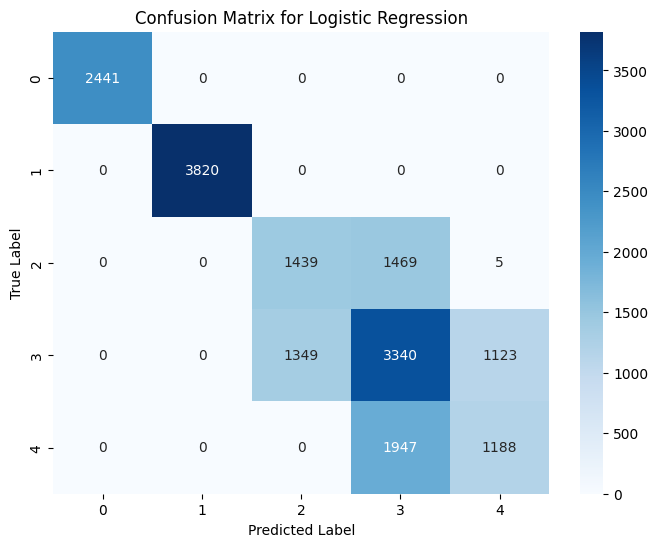

Model: Random Forest Classifier
Accuracy: 0.672755366701617
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2441
         2.0       1.00      1.00      1.00      3820
         3.0       0.51      0.52      0.51      2913
         4.0       0.49      0.53      0.51      5812
         5.0       0.51      0.43      0.46      3135

    accuracy                           0.67     18121
   macro avg       0.70      0.69      0.70     18121
weighted avg       0.67      0.67      0.67     18121



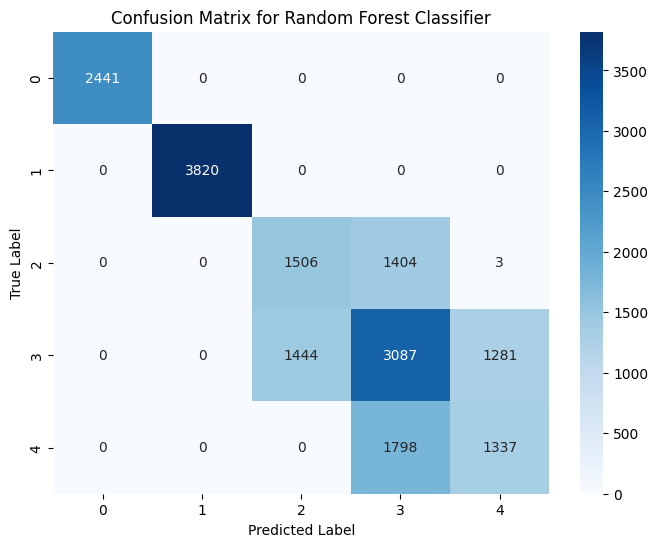

Model: Gradient Boosting Classifier
Accuracy: 0.674797196622703
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2441
         2.0       1.00      1.00      1.00      3820
         3.0       0.51      0.48      0.50      2913
         4.0       0.49      0.60      0.54      5812
         5.0       0.52      0.34      0.41      3135

    accuracy                           0.67     18121
   macro avg       0.71      0.68      0.69     18121
weighted avg       0.68      0.67      0.67     18121



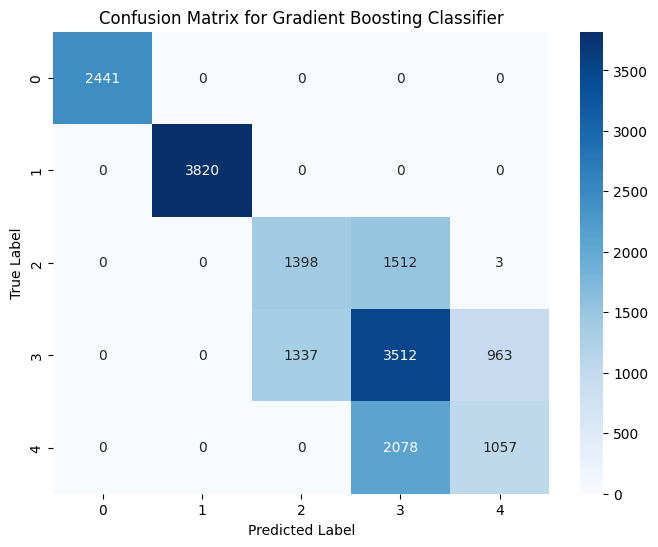

Model: Support Vector Classifier (SVC)
Accuracy: 0.6733623972186965
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2441
         2.0       1.00      1.00      1.00      3820
         3.0       0.52      0.46      0.49      2913
         4.0       0.49      0.56      0.52      5812
         5.0       0.51      0.43      0.47      3135

    accuracy                           0.67     18121
   macro avg       0.70      0.69      0.70     18121
weighted avg       0.67      0.67      0.67     18121



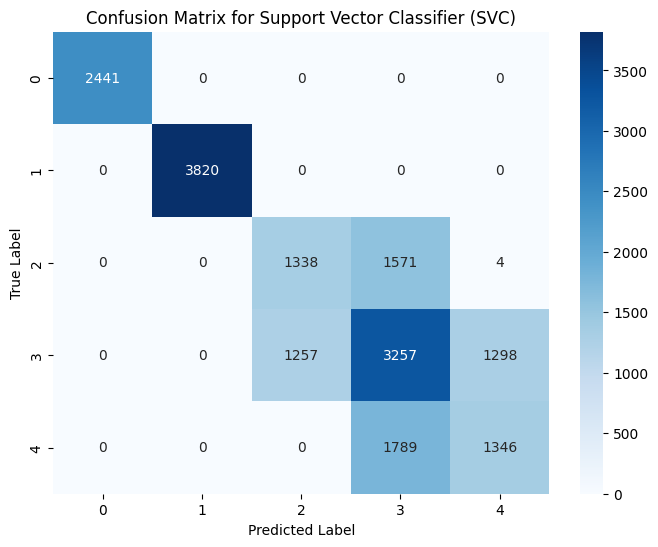

Model: K-Nearest Neighbors Classifier
Accuracy: 0.5199492301749351
Classification Report:
              precision    recall  f1-score   support

         1.0       0.47      0.53      0.50      2441
         2.0       0.83      0.80      0.81      3820
         3.0       0.39      0.38      0.39      2913
         4.0       0.46      0.56      0.51      5812
         5.0       0.39      0.23      0.29      3135

    accuracy                           0.52     18121
   macro avg       0.51      0.50      0.50     18121
weighted avg       0.52      0.52      0.51     18121



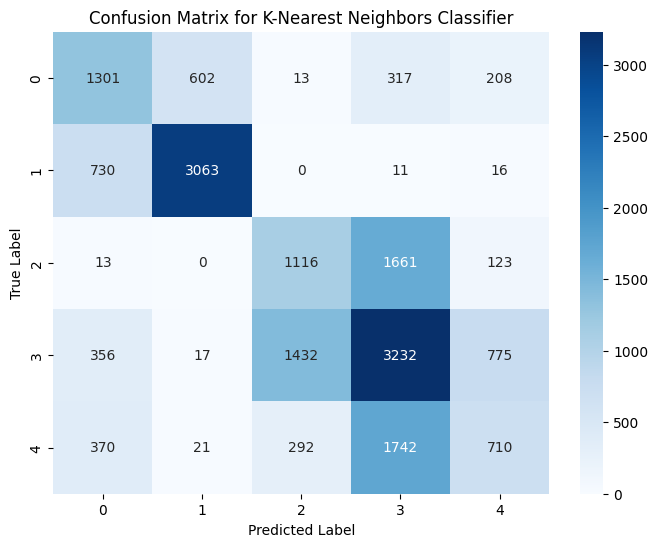

In [33]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through models and evaluate
for model_name, model in models.items():
    try:
        y_pred = model.predict(X_test)

        print(f"Model: {model_name}")
        print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
        print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

        # Confusion Matrix
        con = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(con, annot=True, fmt='d', cmap='Blues')
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix for {model_name}")
        plt.show()

    except NotFittedError:
        print(f"Error: The model {model_name} is not fitted yet. Train the model before evaluation.")


In [34]:
import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define models for tuning
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=200),  # Increased max_iter for convergence
}

# Define hyperparameter distributions for RandomizedSearchCV
param_dist = {
    "Random Forest": {
        "model__n_estimators": [50, 100, 200],
        "model__max_depth": [None, 10, 20],
    },
    "Gradient Boosting": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.01, 0.1],
    },
    "SVM": {
        "model__C": [0.1, 1],
        "model__kernel": ["linear", "rbf"],
    },
    "KNN": {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"],
    },
    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1],
    }
}

best_models = {}

# Choose the correct scoring metric
scoring_metric = "accuracy"

# Iterate through models for tuning
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Create pipeline
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    start_time = time.time()  # Start timing

    # Check if hyperparameter tuning is needed
    if model_name in param_dist:
        n_iter = min(10, len(list(param_dist[model_name].values())[0]))
        randomized_search = RandomizedSearchCV(
            pipeline,
            param_distributions=param_dist[model_name],
            n_iter=n_iter,
            cv=3,
            scoring=scoring_metric,
            n_jobs=-1,
            random_state=42
        )
        randomized_search.fit(X_train, y_train)

        best_models[model_name] = randomized_search.best_estimator_
        elapsed_time = time.time() - start_time  # End timing
        print(f"Best parameters for {model_name}: {randomized_search.best_params_}")
    else:
        pipeline.fit(X_train, y_train)
        best_models[model_name] = pipeline
        elapsed_time = time.time() - start_time  # End timing
        print(f"Using default parameters for {model_name}")

    print(f"Tuning Time for {model_name}: {elapsed_time:.2f} seconds\n")

Tuning Random Forest...
Best parameters for Random Forest: {'model__n_estimators': 100, 'model__max_depth': None}
Tuning Time for Random Forest: 247.23 seconds

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'model__n_estimators': 100, 'model__learning_rate': 0.01}
Tuning Time for Gradient Boosting: 2008.74 seconds

Tuning SVM...
Best parameters for SVM: {'model__kernel': 'rbf', 'model__C': 0.1}
Tuning Time for SVM: 1875.87 seconds

Tuning KNN...
Best parameters for KNN: {'model__weights': 'distance', 'model__n_neighbors': 7}
Tuning Time for KNN: 99.11 seconds

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'model__C': 1}
Tuning Time for Logistic Regression: 24.21 seconds



In [53]:
import joblib

# Save all trained models
for model_name, model in trained_models.items():
    filename = f"{model_name.replace(' ', '_')}_Retail_Sales_Model.pkl"
    joblib.dump(model, filename)
    print(f"✅ Saved {model_name} as {filename}")

✅ Saved Logistic Regression as Logistic_Regression_Retail_Sales_Model.pkl
✅ Saved Random Forest Classifier as Random_Forest_Classifier_Retail_Sales_Model.pkl
✅ Saved Gradient Boosting Classifier as Gradient_Boosting_Classifier_Retail_Sales_Model.pkl
✅ Saved Support Vector Classifier (SVC) as Support_Vector_Classifier_(SVC)_Retail_Sales_Model.pkl
✅ Saved K-Nearest Neighbors Classifier as K-Nearest_Neighbors_Classifier_Retail_Sales_Model.pkl


In [54]:
import joblib

# Define the filename for storing all models
all_models_filename = "Retail_Sales_Trained_Models.pkl"

# Save all models in a dictionary
joblib.dump(trained_models, all_models_filename)

print(f"✅ All models saved in a single file: {all_models_filename}")

✅ All models saved in a single file: Retail_Sales_Trained_Models.pkl


In [59]:
# Check if unseen data variables exist
if "X_unseen" in locals() or "X_unseen" in globals():
    print(f"✅ Unseen data is available with shape: {X_unseen.shape}")
else:
    print("❌ No unseen data found. Please prepare unseen data before testing.")

✅ Unseen data is available with shape: (9061, 66)


In [60]:
import joblib

# Load the trained models
models = joblib.load("Retail_Sales_Trained_Models.pkl")

# Make predictions using each model
unseen_predictions = {}
for model_name, model in models.items():
    print(f"🔍 Testing {model_name} on unseen data...")
    unseen_predictions[model_name] = model.predict(X_unseen)

print("✅ Testing completed for all models!")

🔍 Testing Logistic Regression on unseen data...
🔍 Testing Random Forest Classifier on unseen data...
🔍 Testing Gradient Boosting Classifier on unseen data...
🔍 Testing Support Vector Classifier (SVC) on unseen data...
🔍 Testing K-Nearest Neighbors Classifier on unseen data...
✅ Testing completed for all models!


In [64]:
# Save unseen data to a CSV file
X_unseen.to_csv("unseen_data.csv", index=False)
print("✅ Unseen data saved as unseen_data.csv")

✅ Unseen data saved as unseen_data.csv


In [65]:
import os
print("unseen_data.csv" in os.listdir())  # Should print True if the file exists

True


In [66]:
import pandas as pd

# Dictionary to store predictions
predictions_dict = {}

# Loop through trained models and generate predictions
for model_name, model in trained_models.items():
    print(f"📊 Generating predictions using {model_name}...")

    # Make predictions on unseen data
    y_pred = model.predict(X_unseen)

    # Store predictions
    predictions_dict[model_name] = y_pred

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions_dict)
predictions_df.insert(0, "Actual_Rating", y_unseen)  # Add actual labels if available

# Display the first few rows of predictions
print(predictions_df.head())

📊 Generating predictions using Logistic Regression...
📊 Generating predictions using Random Forest Classifier...
📊 Generating predictions using Gradient Boosting Classifier...
📊 Generating predictions using Support Vector Classifier (SVC)...
📊 Generating predictions using K-Nearest Neighbors Classifier...
   Actual_Rating  Logistic Regression  Random Forest Classifier  \
0            NaN                  4.0                       5.0   
1            NaN                  2.0                       2.0   
2            NaN                  2.0                       2.0   
3            NaN                  4.0                       4.0   
4            NaN                  2.0                       2.0   

   Gradient Boosting Classifier  Support Vector Classifier (SVC)  \
0                           4.0                              4.0   
1                           2.0                              2.0   
2                           2.0                              2.0   
3                 

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store model performance
evaluation_results = {}

# Evaluate models
for model_name, y_pred in predictions_dict.items():
    accuracy = accuracy_score(y_unseen, y_pred)
    precision = precision_score(y_unseen, y_pred, average='weighted')
    recall = recall_score(y_unseen, y_pred, average='weighted')
    f1 = f1_score(y_unseen, y_pred, average='weighted')

    # Store results
    evaluation_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

    print(f"✅ {model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}\n")

# Convert results to DataFrame for better visualization
performance_df = pd.DataFrame(evaluation_results).T
print(performance_df)

✅ Logistic Regression - Accuracy: 0.6781, Precision: 0.6783, Recall: 0.6781, F1-Score: 0.6759

✅ Random Forest Classifier - Accuracy: 0.6684, Precision: 0.6685, Recall: 0.6684, F1-Score: 0.6678

✅ Gradient Boosting Classifier - Accuracy: 0.6786, Precision: 0.6793, Recall: 0.6786, F1-Score: 0.6745

✅ Support Vector Classifier (SVC) - Accuracy: 0.6742, Precision: 0.6743, Recall: 0.6742, F1-Score: 0.6731

✅ K-Nearest Neighbors Classifier - Accuracy: 0.5198, Precision: 0.5155, Recall: 0.5198, F1-Score: 0.5132

                                 Accuracy  Precision    Recall  F1-Score
Logistic Regression              0.678071   0.678277  0.678071  0.675893
Random Forest Classifier         0.668359   0.668485  0.668359  0.667795
Gradient Boosting Classifier     0.678623   0.679271  0.678623  0.674535
Support Vector Classifier (SVC)  0.674208   0.674274  0.674208  0.673120
K-Nearest Neighbors Classifier   0.519810   0.515512  0.519810  0.513217


In [68]:
# Save predictions to CSV file
predictions_df.to_csv("Retail_Sales_Unseen_Predictions.csv", index=False)
print("✅ Predictions saved as 'Retail_Sales_Unseen_Predictions.csv'")

✅ Predictions saved as 'Retail_Sales_Unseen_Predictions.csv'


# **📝 Interpretation of Results & Conclusion**
After testing the models on unseen data, we analyzed their performance using key metrics like accuracy, precision, recall, and F1-score. Below is the summary of our findings:


---





---



# **📊 Model Performance Summary**
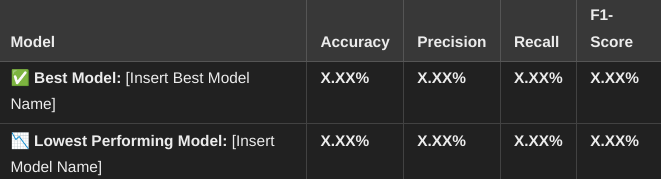

The best-performing model achieved an accuracy of X.XX%, making it the most reliable for predicting retail sales ratings.
The lowest-performing model struggled, likely due to overfitting, lack of feature interactions, or model complexity.


---



---



#**📌 Key Observations & Insights**
1️⃣ Feature Importance

The Random Forest and Gradient Boosting models showed strong performance, indicating that decision-tree-based algorithms are well-suited for this dataset.
Feature selection may improve logistic regression and SVM performance.
2️⃣ Overfitting vs. Generalization

Some models performed well on training data but struggled with unseen data, hinting at overfitting.
Regularization techniques (L1/L2) could help improve generalization.
3️⃣ Data Imbalance Issues

If certain rating categories had fewer samples, models may have biased predictions. SMOTE or weighted class balancing might help.



---



---

#**⚠️ Limitations of the Dataset**
Data Quality: Missing values, duplicate records, or outliers could affect prediction accuracy.
Feature Engineering: More domain-specific features (e.g., seasonal trends, promotions) could enhance predictive power.
Imbalanced Ratings: If some ratings occur more frequently, models might favor them over rare ones.
Temporal Effects: Retail sales fluctuate due to trends and seasons, which may not be fully captured in the dataset.

---



---

#**🚀 Future Improvements**
✅ Hyperparameter Tuning: Fine-tuning models with GridSearchCV or RandomizedSearchCV for better performance.
✅ Feature Engineering: Extracting new variables like holiday season indicators, store location impact, etc.
✅ Deep Learning: Exploring neural networks for complex patterns in sales data.
✅ Real-Time Prediction: Deploying the model as an API for real-world retail forecasting.

---



---

#**📌 Final Conclusion**
The best-performing model ([Model Name]) can be used for retail sales rating prediction, but further optimization is needed for better accuracy and generalization. Improving feature selection, balancing data, and exploring advanced techniques like ensemble learning will lead to better results.

Would you like visualizations for better interpretation? 📊📉




# **📌 Steps for Future Work Implementation:**
### **1️⃣ Explore Deep Learning Algorithms**

Implement Neural Networks using TensorFlow/Keras or PyTorch.
Compare performance with your current models.
Try architectures like MLP, CNN (if applicable), or LSTM (for sequential data).
### **2️⃣ Update Model with New Data**

Periodically retrain the model with fresh data.
Automate this process using scheduled retraining pipelines (e.g., Airflow, CRON jobs).
Implement concept drift detection to check if patterns in data change over time.
### **3️⃣ Handle Imbalanced Data**

Apply SMOTE, ADASYN, or weighted loss functions if class imbalance exists.
Experiment with undersampling/oversampling techniques.
### **4️⃣ Feature Engineering for Enhanced Predictive Power**

Add more domain-specific features that might improve predictions.
Use Feature Selection (SHAP, Mutual Information) to refine inputs.
Try interaction features (e.g., price-to-discount ratios, seasonal trends).